# What is the optimal skill to learn for Data Analysts?

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_RO = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Romania')].copy()

df_DA_RO.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
750935,Data Analyst,Internship - Data Analyst Trainee,"Timișoara, Romania",via Nokia - Talentify,Full-time,False,Romania,2023-01-25 21:05:06,False,False,Romania,None,NaN,NaN,Nokia,"[vba, sql, express, power bi, excel]","{'analyst_tools': ['power bi', 'excel'], 'prog..."
2425,Data Analyst,Data Analyst with Data Visualization,"Bucharest, Romania",via LinkedIn,Full-time,False,Romania,2023-09-13 13:17:17,False,False,Romania,None,NaN,NaN,Swicon IT Services srl. Romania,"[sql, python, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
139430,Data Analyst,Data Analyst Internship,Anywhere,via LinkedIn,Part-time,True,Romania,2023-04-10 08:28:04,False,False,Romania,None,NaN,NaN,KRUK România,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
11141,Data Analyst,Financial Data Analyst,"Bucharest, Romania",via LinkedIn,Full-time,False,Romania,2023-02-01 14:05:05,True,False,Romania,None,NaN,NaN,BRD - Groupe Societe Generale,"[sas, sas, oracle]","{'analyst_tools': ['sas'], 'cloud': ['oracle']..."
599515,Data Analyst,Clinical Data Analyst,Anywhere,via LinkedIn,Full-time,True,Romania,2023-07-07 09:30:25,True,False,Romania,None,NaN,NaN,ICON plc,"[sas, sas, python]","{'analyst_tools': ['sas'], 'programming': ['sa..."


In [3]:
df_DA_RO = df_DA_RO.dropna(subset=['salary_year_avg'])
df_DA_RO_exploded = df_DA_RO.explode('job_skills')
df_DA_RO_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
162997,43200.0,sql
162997,43200.0,python
162997,43200.0,sap
174496,89100.0,spark
174496,89100.0,sap


In [7]:
df_DA_skills = df_DA_RO_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('count',ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_DA_skills

,skill_count,median_salary
job_skills,,
excel,5,56700.0
sap,5,89100.0
spark,4,89100.0
sql,4,71057.0
vba,3,56700.0
go,2,52014.0
python,2,48107.0
azure,1,89100.0
javascript,1,109120.0


In [8]:
DA_job_count = len(df_DA_RO)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
excel,5,56700.0,41.666667
sap,5,89100.0,41.666667
spark,4,89100.0,33.333333
sql,4,71057.0,33.333333
vba,3,56700.0,25.000000
go,2,52014.0,16.666667
python,2,48107.0,16.666667
azure,1,89100.0,8.333333
javascript,1,109120.0,8.333333


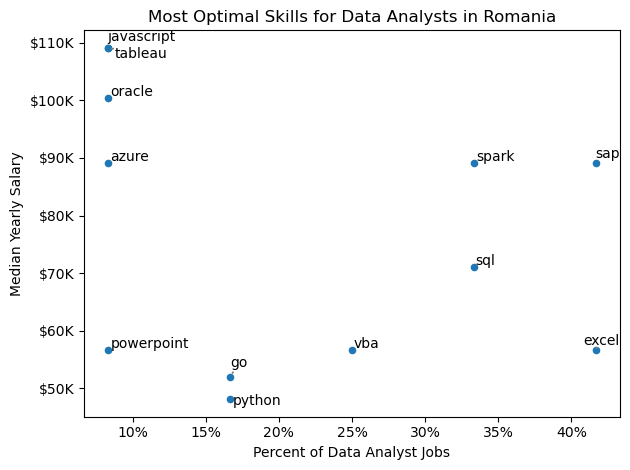

In [19]:
from adjustText import adjust_text

df_DA_skills.plot(kind='scatter',x='skill_percent',y='median_salary')

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Romania')
plt.tight_layout()

texts = []
for i,txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], df_DA_skills['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->',color='gray'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()